In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

https://www.kaggle.com/c/titanic

# Загрузка данных

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/57984/titanic.csv', index_col=0)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<b>Survived</b> - Выжил (0 = No, 1 = Yes) <br>
<b>Pclass</b>  - Класс билета (1 = 1st, 2 = 2nd, 3 = 3rd)<br>
<b>Sex</b>  - Пол (male = мужчина, female = женщина)	<br>
<b>Age</b>  - Возраст в годах <br>
<b>SibSp</b>  - Кол-во сестер/братьев/жен/мужей на Титанике 	<br>
<b>Parch</b>  - Кол-во родителей/детей на Титанике	<br>
<b>Ticket</b>  - Номер билета	<br>
<b>Fare</b>  - Плата за проезд 	<br>
<b>Cabin</b>  - Номер каюты 	<br>
<b>Embarked</b>  - 	Порт погрузки (C = Cherbourg, Q = Queenstown, S = Southampton)<br>

# Анализ данных 

In [ ]:
df.shape

(891, 11)

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
# Статистика
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Посмотрим, кого больше на борту: женщин или мужчин?

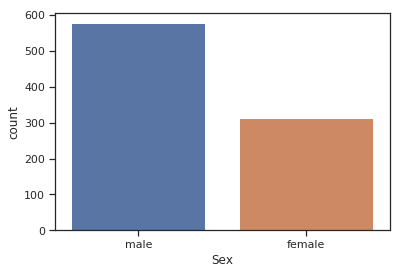

In [ ]:
sns.set(style="ticks")
sns.countplot('Sex', data=df)

Разделим эту статистику по классам 

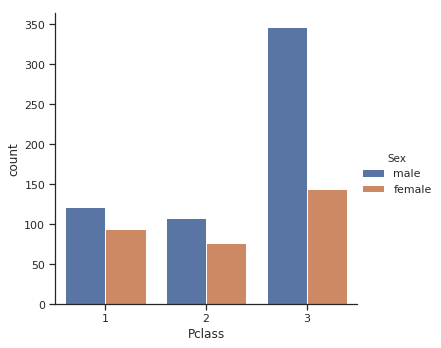

In [ ]:
sns.catplot('Pclass', data=df, hue='Sex', kind='count')

Узнаем сколько детей путешествовало на титанике

In [ ]:
df['Person'] = df.Sex
df.loc[df['Age'] < 16, 'Person'] = 'Child'

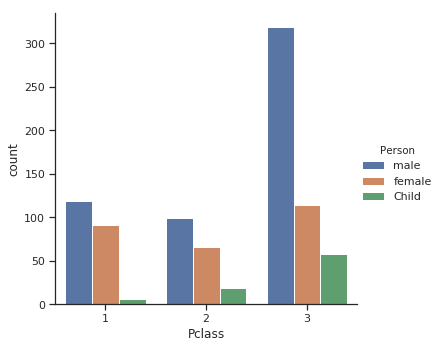

In [ ]:
sns.catplot('Pclass', data=df, hue='Person', kind='count')

Изобразим распределение по возрастам

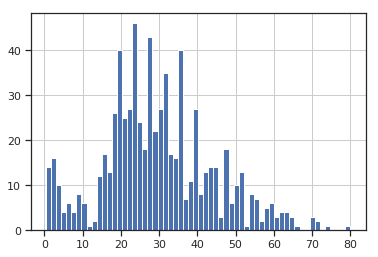

In [ ]:
df.Age.hist(bins=60)

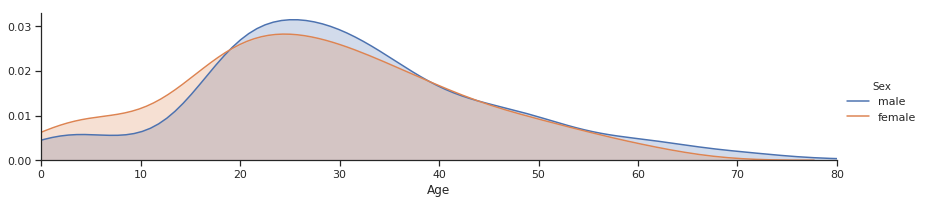

In [ ]:
# Еще один способ визуализировать данные - FacetGrid

fig = sns.FacetGrid(df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

fig.set(xlim=(0, df['Age'].max()))

fig.add_legend()

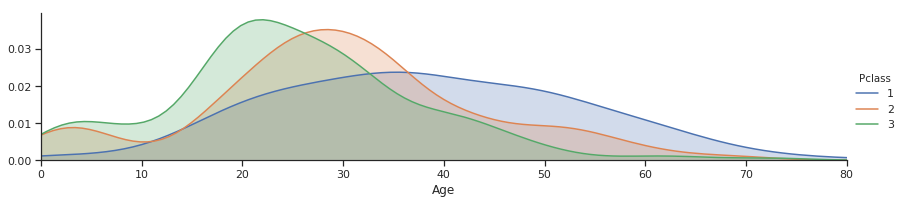

In [ ]:
# Тоже самое с классом билета

fig = sns.FacetGrid(df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

fig.set(xlim=(0, df['Age'].max()))

fig.add_legend()

In [ ]:
df.sort_values(by='Ticket').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S,female
258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S,female
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S,female
263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S,male
559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,female


Билеты имеют какой-то странный формат<br>
Видно, что по одному номеру билета путешествовало сразу несколько людей, причем часто — с разными фамилиями

In [ ]:
df.Cabin[df.Cabin.notna()].unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [ ]:
df[df.Cabin.isin(['C23 C25 C27','B96 B98'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,male
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,female
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,female
391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S,male
436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S,Child
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,male
764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S,female
803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S,Child


Номера кают прописаны мало у когo<br>
В существующих номерах кают прописан код палубы

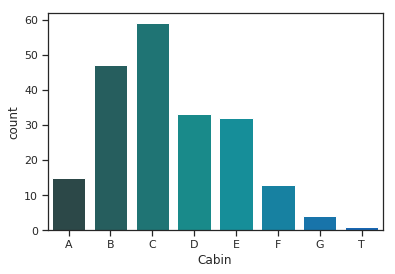

In [ ]:
levels = []
for level in df['Cabin'].dropna():
    levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin', inplace=True)
sns.countplot('Cabin', data=cabin_df, palette='winter_d')

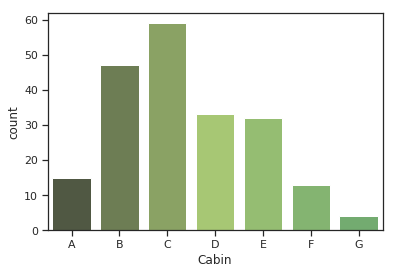

In [ ]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin', data=cabin_df, palette='summer_d')

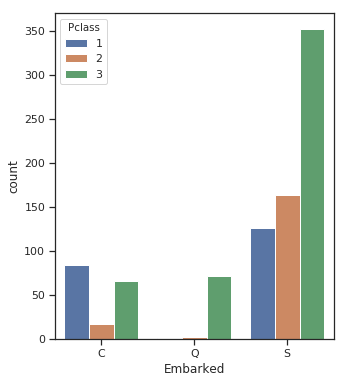

In [ ]:
plt.figure(figsize=(5, 6))
sns.countplot('Embarked', data=df, hue='Pclass', order=['C', 'Q', 'S'])

In [ ]:
df.sort_values(by='Name').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,male
747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,male
280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,female
309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C,male
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C,female


Отсортировав по имени, получаем, что многие путешествовали семьями, часто семьи оказались разделены, выжила лишь часть

In [ ]:
df['Family'] = df.Parch + df.SibSp

In [ ]:
df['Is_Alone'] = df.Family == 0

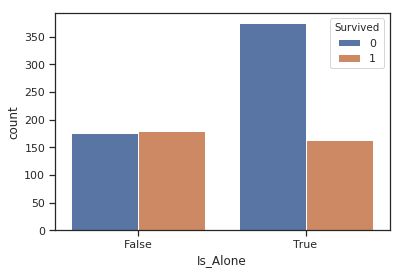

In [ ]:
sns.countplot('Is_Alone', hue='Survived', data=df)

In [ ]:
df.describe()['Fare']

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
bins = [-1]
bins = np.append(bins, df.describe()['Fare'][4:-1].values)
bins = np.append(bins, df['Fare'].max())
bins

array([ -1.    ,   7.9104,  14.4542,  31.    , 512.3292])

In [ ]:
df['Category_fare'] = pd.cut(df['Fare'], bins=bins, labels=['Low', 'Mid', 'High_Mid', 'High'])

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Is_Alone,Category_fare
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,False,Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,False,High
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,True,Mid
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,False,High
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,True,Mid


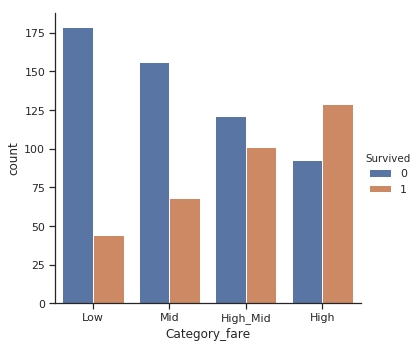

In [ ]:
sns.catplot('Category_fare', hue='Survived', data=df, kind='count')

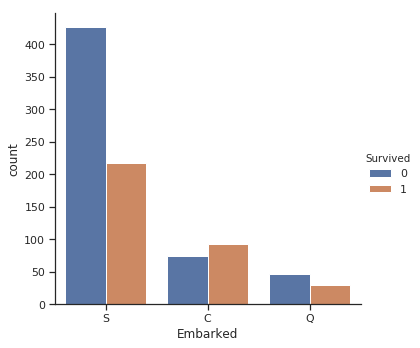

In [ ]:
sns.catplot('Embarked', hue='Survived', data=df, kind='count')

# Целевая переменная

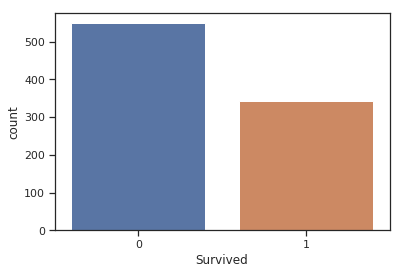

In [ ]:
sns.countplot('Survived', data=df)

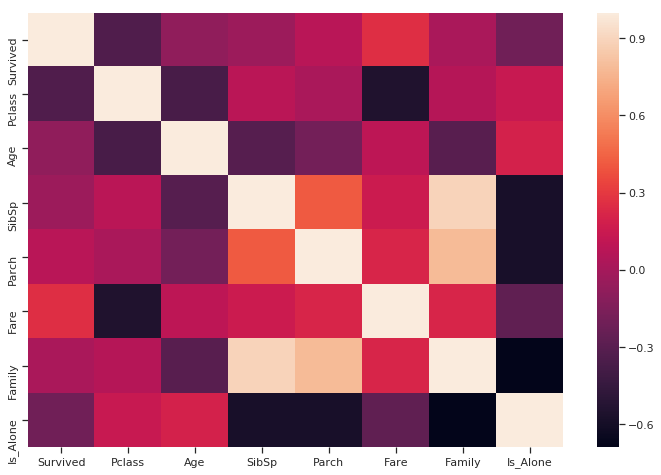

In [ ]:
# Корреляционная матрица
data_corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr)

Выведем статистику выживаемости в зависимости от класса и пола.

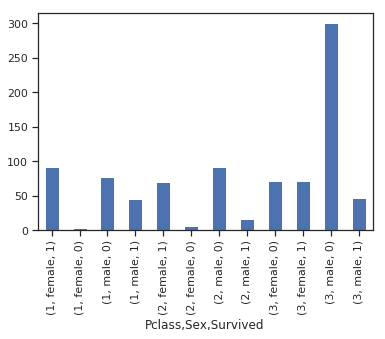

In [ ]:
df.groupby(["Pclass", "Sex"])["Survived"].value_counts().plot(kind='bar');

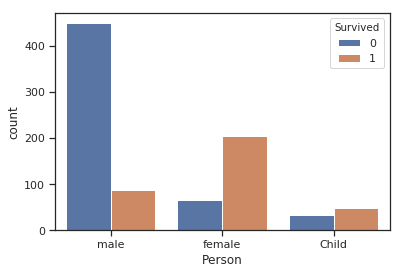

In [ ]:
sns.countplot('Person', hue='Survived', data=df)

In [ ]:
df.nunique()

Survived           2
Pclass             3
Name             891
Sex                2
Age               88
SibSp              7
Parch              7
Ticket           681
Fare             248
Cabin            147
Embarked           3
Person             3
Family             9
Is_Alone           2
Category_fare      4
dtype: int64

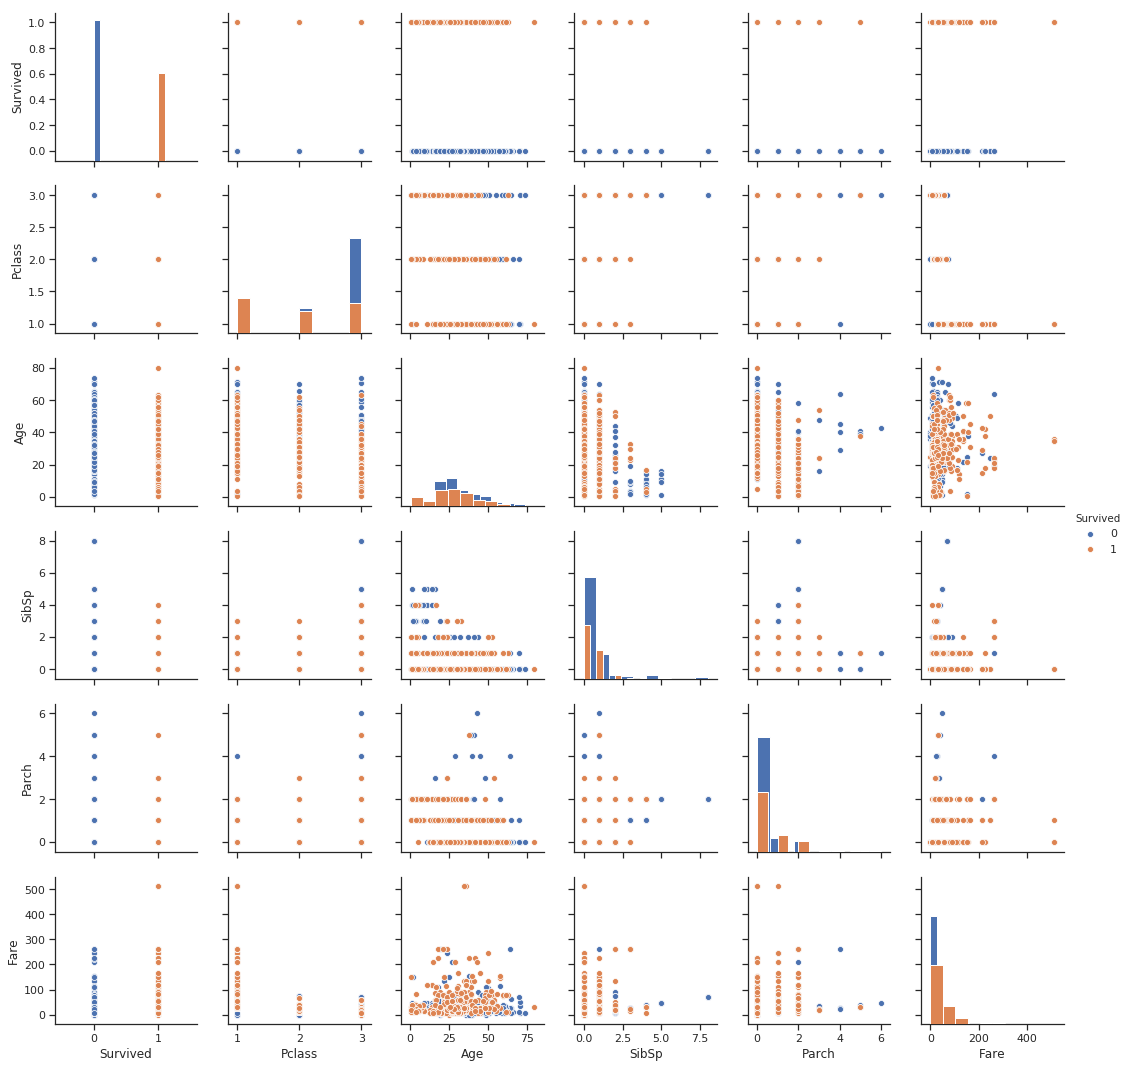

In [ ]:
# анализ отношений между типами по всем комбинациям признаков
cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(df[cols], hue='Survived', diag_kind='hist')

# Обработка пропущенных значений

In [ ]:
# Количество строк с пропущенными значениями 
df.isna().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Person             0
Family             0
Is_Alone           0
Category_fare      0
dtype: int64

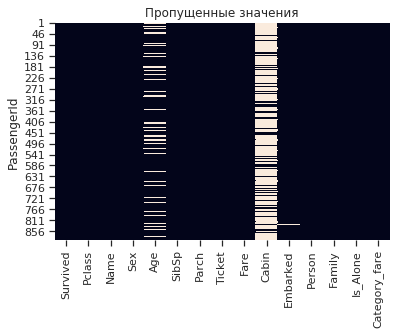

In [ ]:
sns.heatmap(df.isnull(), cbar = False).set_title("Пропущенные значения");

In [ ]:
df.Embarked.mode()

0    S
dtype: object

In [ ]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [ ]:
df.Cabin = df.Cabin.fillna('NA')

In [ ]:
df['Salutation'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Is_Alone,Category_fare,Salutation
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,male,1,False,Low,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,False,High,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,female,0,True,Mid,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,False,High,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,male,0,True,Mid,Mr


In [ ]:
grp = df.groupby(['Sex', 'Pclass', 'Salutation'])
df.Age = grp.Age.apply(lambda x: x.fillna(x.median()))
# df.Age.fillna(df.Age.median, inplace = True)

In [ ]:
grp.Age.median()

Sex     Pclass  Salutation  
female  1       Dr              49.0
                Lady            48.0
                Miss            30.0
                Mlle            24.0
                Mme             24.0
                Mrs             41.5
                the Countess    33.0
        2       Miss            24.0
                Mrs             32.0
                Ms              28.0
        3       Miss            18.0
                Mrs             31.0
male    1       Capt            70.0
                Col             58.0
                Don             40.0
                Dr              44.0
                Jonkheer        38.0
                Major           48.5
                Master           4.0
                Mr              40.0
                Sir             49.0
        2       Dr              38.5
                Master           1.0
                Mr              31.0
                Rev             46.5
        3       Master           4.0
         

In [ ]:
df.loc[[1, 878, 879, 889]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Is_Alone,Category_fare,Salutation
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,male,1,False,Low,Mr
878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NA,S,male,0,True,Low,Mr
879,0,3,"Laleff, Mr. Kristo",male,26.0,0,0,349217,7.8958,NA,S,male,0,True,Low,Mr
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NA,S,female,3,False,High_Mid,Miss


# Подготовка данных

In [ ]:
Y = df['Survived']
X = df[df.columns[1:]]

In [ ]:
X['Deck'] = X.Cabin.str[0]

In [ ]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Is_Alone,Category_fare,Salutation,Deck
PassengerId,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,male,1,False,Low,Mr,N
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,False,High,Mrs,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,female,0,True,Mid,Miss,N
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,False,High,Mrs,C
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,male,0,True,Mid,Mr,N


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

In [ ]:
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
X['Cabin'] = LabelEncoder().fit_transform(X['Cabin'])
X['Embarked'] = LabelEncoder().fit_transform(X['Embarked'])

In [ ]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Is_Alone,Category_fare,Salutation,Deck
PassengerId,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,2,male,1,False,Low,Mr,N
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,female,1,False,High,Mrs,C
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,2,female,0,True,Mid,Miss,N
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,female,1,False,High,Mrs,C
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,2,male,0,True,Mid,Mr,N


In [ ]:
pd.get_dummies(X.Category_fare, prefix="Fare").head()

,Fare_Low,Fare_Mid,Fare_High_Mid,Fare_High
PassengerId,,,,
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1
5,0,1,0,0


In [ ]:
pd.concat([X, pd.get_dummies(X.Category_fare, prefix="Fare")], axis=1).head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Is_Alone,Category_fare,Salutation,Deck,Fare_Low,Fare_Mid,Fare_High_Mid,Fare_High
PassengerId,,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,2,male,1,False,Low,Mr,N,1,0,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,female,1,False,High,Mrs,C,0,0,0,1
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,2,female,0,True,Mid,Miss,N,0,1,0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,female,1,False,High,Mrs,C,0,0,0,1
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,2,male,0,True,Mid,Mr,N,0,1,0,0


In [ ]:
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Person', 'Family', 'Is_Alone', 'Category_fare',
       'Salutation', 'Deck'],
      dtype='object')

In [ ]:
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [ ]:
# Разделяем выборку на обучающую и тестовую

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X[cols], Y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)

(712, 8) (179, 8)


In [ ]:
Y_train.value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [ ]:
Y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

# Обучение модели

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Дерево решений со стандартными параметрами

tree = DecisionTreeClassifier()

tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# Предсказания
from sklearn.metrics import accuracy_score
pred_tree_train = tree.predict(X_train)
pred_tree_test = tree.predict(X_test)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, pred_tree_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, pred_tree_test), 2))

Правильность на обучающем наборе:  0.99
Правильность на тестовом наборе:  0.8


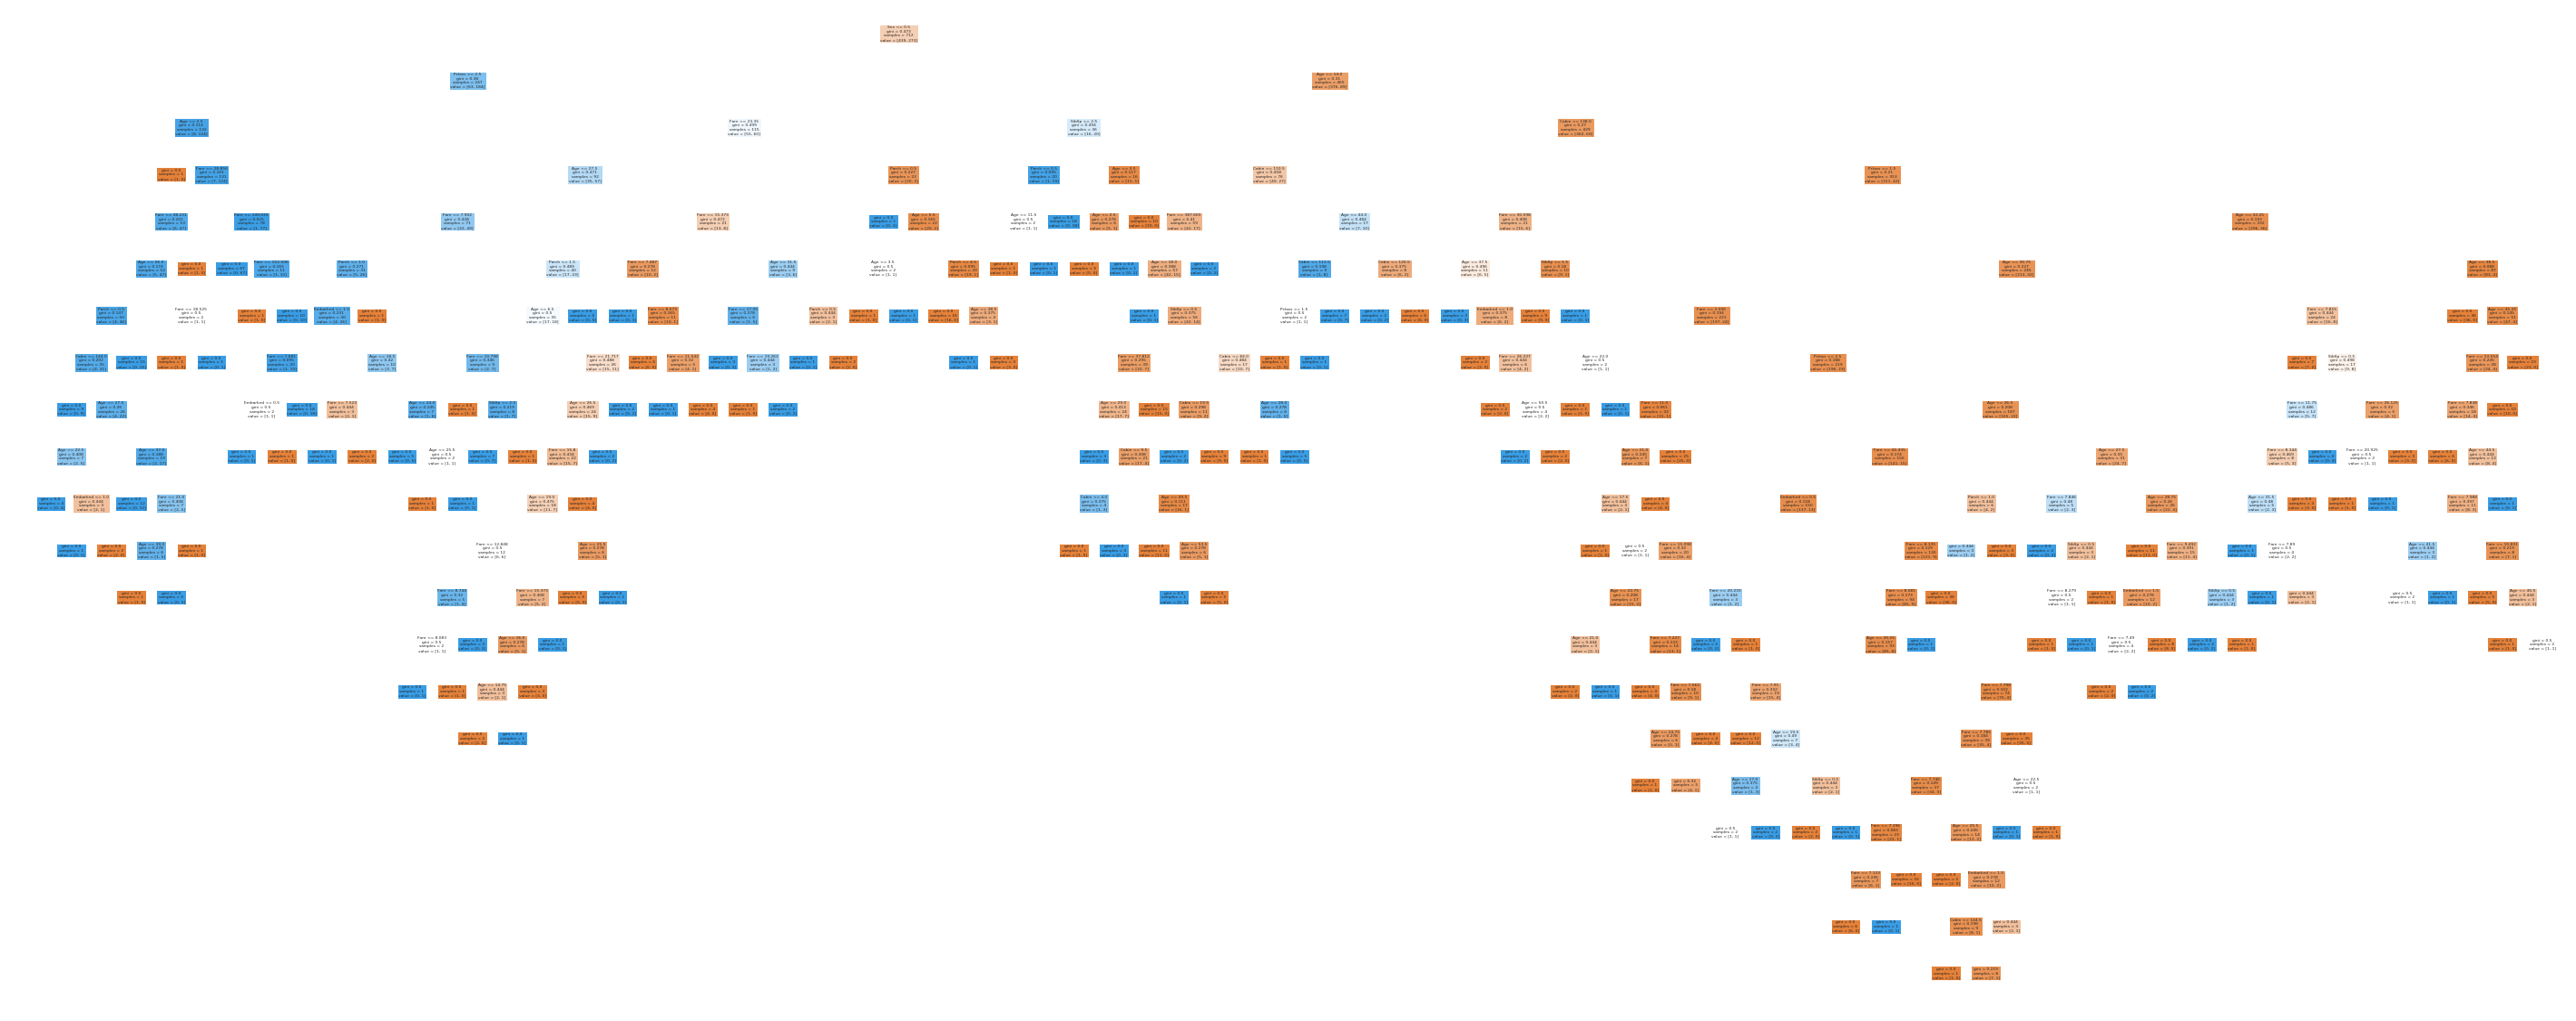

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 20))
plot_tree(tree, feature_names=list(X[cols]), filled=True);

### Кросс-валидация

In [ ]:
max_depth_values = range(1, 50)
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, Y_train)
    train_score = tree.score(X_train, Y_train)
    test_score = tree.score(X_test, Y_test)
  
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                  'train_score': [train_score],
                                  'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [ ]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.786517,0.787709
0,2,0.792135,0.782123
0,3,0.837079,0.821229
0,4,0.849719,0.810056
0,5,0.866573,0.821229


In [ ]:
scores_data_to_plot = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                             var_name='type', value_name='score')

In [ ]:
scores_data_to_plot.head()

,max_depth,type,score
0,1,train_score,0.786517
1,2,train_score,0.792135
2,3,train_score,0.837079
3,4,train_score,0.849719
4,5,train_score,0.866573


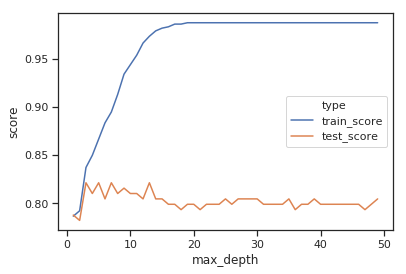

In [ ]:
sns.lineplot('max_depth', y='score', hue='type', data=scores_data_to_plot)

In [ ]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(max_depth=4)
cross_val_score(tree, X_train, Y_train, cv=5)

array([0.7972028 , 0.82517483, 0.8041958 , 0.80985915, 0.83687943])

In [ ]:
cross_val_score(tree, X_train, Y_train, cv=5).mean()

0.8146624028254236

In [ ]:
max_depth_values = range(1, 50)
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, Y_train)
    train_score = tree.score(X_train, Y_train)
    test_score = tree.score(X_test, Y_test)
    mean_cross_val_score = cross_val_score(tree, X_train, Y_train, cv=5).mean()
  
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                  'train_score': [train_score],
                                  'test_score': [test_score],
                                  'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [ ]:
scores_data_to_plot = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                             var_name='type', value_name='score')

In [ ]:
scores_data_to_plot[scores_data_to_plot.type == 'cross_val_score'].sort_values('score', ascending=False).head()

,max_depth,type,score
100,3,cross_val_score,0.816041
101,4,cross_val_score,0.814662
102,5,cross_val_score,0.813264
103,6,cross_val_score,0.807650
104,7,cross_val_score,0.804803


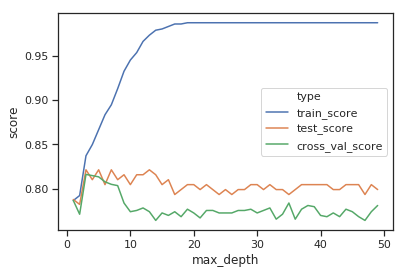

In [ ]:
sns.lineplot('max_depth', y='score', hue='type', data=scores_data_to_plot)

In [ ]:
# Поиск оптимальных гиперпараметров по сетке

param_grid=[{
             'max_depth': range(1, 15), 
             'min_samples_leaf': range(1, 10), 
            }]

в GridSearchCV можно передать [scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) - метрика, которую поиск по сетке будет пытаться улучшить 

In [ ]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': range(1, 15),
                          'min_samples_leaf': range(1, 10)}],
             pre_disp

In [ ]:
# Предсказания
best_tree = grid_search.best_estimator_
pred_tree_train = best_tree.predict(X_train)
pred_tree_test = best_tree.predict(X_test)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, pred_tree_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, pred_tree_test), 2))

Правильность на обучающем наборе:  0.87
Правильность на тестовом наборе:  0.85


In [ ]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 5}

In [ ]:
confusion_matrix(Y_test, pred_tree_test)

array([[104,   6],
       [ 20,  49]])

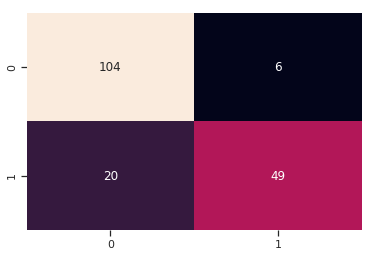

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
sns.heatmap(confusion_matrix(Y_test, pred_tree_test), annot=True, fmt="d", cbar=False)

# TPR = TP / (TP + FN) = 49 / (49 + 6) = 0,8909
# FPR = FP / (FP + TN) = 20 / (20 + 104) = 0,16129

In [ ]:
print(classification_report(Y_test, pred_tree_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       110
           1       0.89      0.71      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



In [ ]:
# Значимость признаков
feature = pd.DataFrame(X_train.columns)
feature['importances'] = best_tree.feature_importances_
feature.sort_values(by='importances', ascending=False).head(8)

,0,importances
1,Sex,0.497722
2,Age,0.136565
0,Pclass,0.116456
5,Fare,0.111237
3,SibSp,0.070502
6,Cabin,0.049567
4,Parch,0.015093
7,Embarked,0.002860


In [ ]:
pred_tree_test

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [ ]:
pred_proba_test = best_tree.predict_proba(X_test)
pred_proba_test

array([[0.87830688, 0.12169312],
       [0.87830688, 0.12169312],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.4       , 0.6       ],
       [0.65714286, 0.34285714],
       [0.8       , 0.2       ],
       [0.87830688, 0.12169312],
       [0.4       , 0.6       ],
       [0.87830688, 0.12169312],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.4       , 0.6       ],
       [0.87830688, 0.12169312],
       [0.96875   , 0.03125   ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.96875   , 0.03125   ],
       [0.        , 1.        ],
       [0.87830688, 0.12169312],
       [1.        , 0.        ],
       [0.57692308, 0.42307692],
       [0.        , 1.        ],
       [0.52941176, 0.47058824],
       [0.2       , 0.8       ],
       [0.25      , 0.75      ],
       [0.88888889, 0.11111111],
       [1.

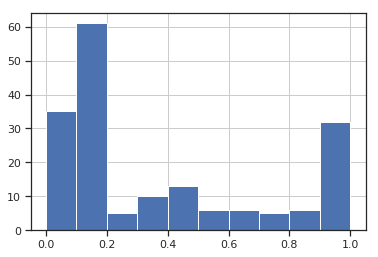

In [ ]:
pd.Series(pred_proba_test[:,1]).hist()

In [ ]:
pred_test = np.where(pred_proba_test[:,1] >= 0.7, 1, 0)
# 0. , 0.2, 0.6, 1.

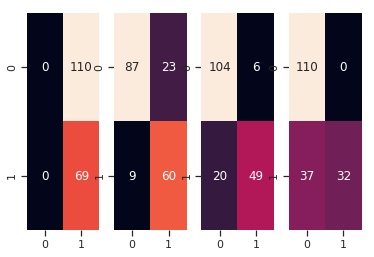

In [ ]:
#
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4)
pred_test1 = np.where(pred_proba_test[:,1] >= 0., 1, 0)
sns.heatmap(confusion_matrix(Y_test, pred_test1), annot=True, fmt="d", cbar=False, ax=ax1)

pred_test2 = np.where(pred_proba_test[:,1] >= 0.2, 1, 0)
sns.heatmap(confusion_matrix(Y_test, pred_test2), annot=True, fmt="d", cbar=False, ax=ax2)

pred_test3 = np.where(pred_proba_test[:,1] >= 0.6, 1, 0)
sns.heatmap(confusion_matrix(Y_test, pred_test3), annot=True, fmt="d", cbar=False, ax=ax3)

pred_test4 = np.where(pred_proba_test[:,1] >= 1., 1, 0)
sns.heatmap(confusion_matrix(Y_test, pred_test4), annot=True, fmt="d", cbar=False, ax=ax4)

# TPR = TP / (TP + FN) = 49 / (49 + 6) = 0,8909
# FPR = FP / (FP + TN) = 20 / (20 + 104) = 0,16129
# TN   FN
# FP   TP


In [ ]:
print(classification_report(Y_test, pred_test))
confusion_matrix(Y_test, pred_test)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       110
           1       0.91      0.57      0.70        69

    accuracy                           0.81       179
   macro avg       0.84      0.76      0.78       179
weighted avg       0.83      0.81      0.80       179



array([[106,   4],
       [ 30,  39]])

In [ ]:
precision_score(Y_test, pred_test), recall_score(Y_test, pred_test)

(0.9069767441860465, 0.5652173913043478)

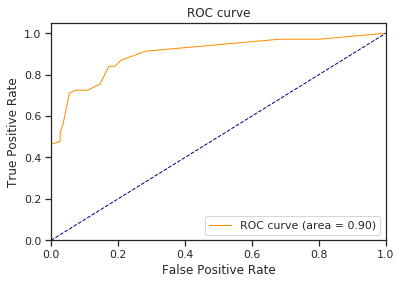

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, pred_proba_test[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
# FPR = FP / (FP+TN)

# Метод ближайших соседей

In [ ]:
# Масштабирование признаков

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

print('Минимум и максимум обучающего набора: ', X_train.min(), X_train.max())
print('Минимум и максимум тестового набора: ', X_test.min(), X_test.max())

Минимум и максимум обучающего набора:  0.0 1.0
Минимум и максимум тестового набора:  -0.003151392915668726 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Предсказания
pred_kn_train = kn.predict(X_train)
pred_kn_test = kn.predict(X_test)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, pred_kn_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, pred_kn_test), 2))

Правильность на обучающем наборе:  0.86
Правильность на тестовом наборе:  0.84


In [ ]:
print(f'Класс тестового примера: {Y_test.iloc[0]}')
dist, indices = kn.kneighbors(X_test[0].reshape(1, -1))
dist, indices

Класс тестового примера: 0


(array([[0.00845004, 0.01121505, 0.01280915, 0.01280915, 0.01411026]]),
 array([[510, 385, 215, 641,  61]]))

In [ ]:
print(Y_train.iloc[indices[0]])

PassengerId
208    1
585    0
421    0
43     0
833    0
Name: Survived, dtype: int64


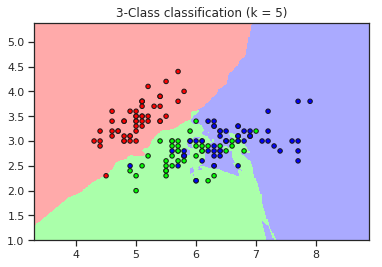

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

h = .02 

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors,))

plt.show()

In [ ]:
# Поиск оптимальных гиперпараметров по сетке

param_grid=[{
             'n_neighbors':[1, 2, 3, 5, 10, 20, 30, 40, 50],
             'weights': ['uniform', 'distance'],
             'metric': ['minkowski', "manhattan", "euclidean", "chebyshev"]
            }]

kn = KNeighborsClassifier()
grid_search = GridSearchCV(kn, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Предсказания
pred_kn_train = grid_search.predict(X_train)
pred_kn_test = grid_search.predict(X_test)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, pred_kn_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, pred_kn_test), 2))

Правильность на обучающем наборе:  0.83
Правильность на тестовом наборе:  0.82


In [ ]:
grid_search.best_params_

{'metric': 'chebyshev', 'n_neighbors': 10, 'weights': 'uniform'}

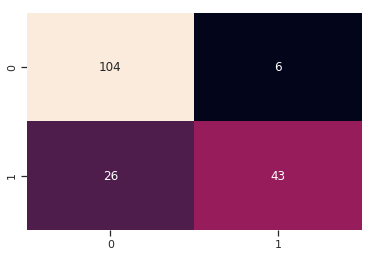

In [ ]:
sns.heatmap(confusion_matrix(Y_test, pred_kn_test), annot=True, fmt="d", cbar=False)

In [ ]:
print(classification_report(Y_test, pred_kn_test))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       110
           1       0.88      0.62      0.73        69

    accuracy                           0.82       179
   macro avg       0.84      0.78      0.80       179
weighted avg       0.83      0.82      0.81       179



In [ ]:
best_kn = grid_search.best_estimator_
pred_proba_test = best_kn.predict_proba(X_test)

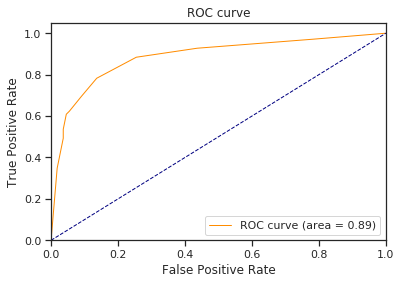

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, pred_proba_test[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Y = df['Survived']
X = df.drop(columns='Survived')

In [ ]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Is_Alone,Category_fare,Salutation
PassengerId,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,male,1,False,Low,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,False,High,Mrs
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,female,0,True,Mid,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,False,High,Mrs
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,male,0,True,Mid,Mr


In [ ]:
X.nunique()

Pclass             3
Name             891
Sex                2
Age               89
SibSp              7
Parch              7
Ticket           681
Fare             248
Cabin            148
Embarked           3
Person             3
Family             9
Is_Alone           2
Category_fare      4
Salutation        17
dtype: int64

In [ ]:
X = X.drop(['Name', 'Fare', 'Age', 'Ticket', 'Cabin'], axis=1)

In [ ]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Person,Family,Is_Alone,Category_fare,Salutation
PassengerId,,,,,,,,,,
1,3,male,1,0,S,male,1,False,Low,Mr
2,1,female,1,0,C,female,1,False,High,Mrs
3,3,female,0,0,S,female,0,True,Mid,Miss
4,1,female,1,0,S,female,1,False,High,Mrs
5,3,male,0,0,S,male,0,True,Mid,Mr
